In [37]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

import matplotlib.pyplot as plt

In [38]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

In [39]:
print(train_images.shape[1:])

(28, 28)


In [40]:
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)

784


In [41]:
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

In [42]:
#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')

In [43]:
#scale data
train_data /=255.0
test_data /=255.0

In [44]:
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [45]:
#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [46]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1, validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.2685 - accuracy: 0.9178 - val_loss: 0.1192 - val_accuracy: 0.9619
Epoch 2/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.0932 - accuracy: 0.9709 - val_loss: 0.0920 - val_accuracy: 0.9729
Epoch 3/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.0571 - accuracy: 0.9819 - val_loss: 0.0681 - val_accuracy: 0.9793
Epoch 4/10
60000/60000 [==============================] - 7s 112us/step - loss: 0.0409 - accuracy: 0.9875 - val_loss: 0.0730 - val_accuracy: 0.9801
Epoch 5/10
60000/60000 [==============================] - 7s 112us/step - loss: 0.0285 - accuracy: 0.9905 - val_loss: 0.0724 - val_accuracy: 0.9808
Epoch 6/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.0224 - accuracy: 0.9930 - val_loss: 0.0739 - val_accuracy: 0.9797
Epoch 7/10
60000/60000 [==============================] - 6s 1

In [47]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

10000/10000 [==============================] - 1s 79us/step
Evaluation result on Test Data : Loss = 0.08907846454361236, accuracy = 0.9815000295639038


### Question 1 



> Using the history object in the source code, plot the loss and accuracy for both training data and validation data.




Accuracy

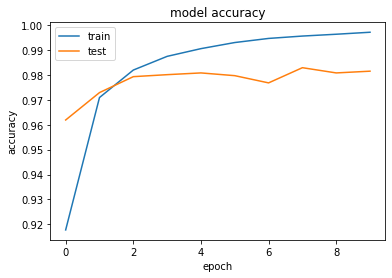

In [48]:
# Plot the graph for accuracy of both train and test data.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Loss

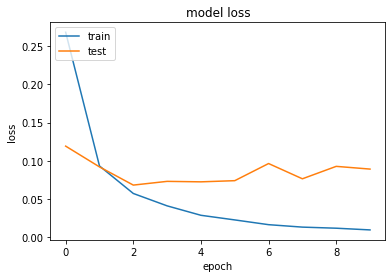

In [49]:
# Plot the graph for loss of both train and test data.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Question 2



> plot one of the images in the test data, and then do inferencing to check what is the prediction of the model on that
single image in the test data



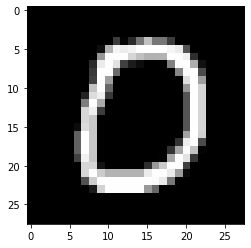

In [68]:
plt.imshow(test_images[10].reshape((28, 28)), cmap = 'gray')
plt.show()

In [69]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

10000/10000 [==============================] - 1s 82us/step
Evaluation result on Test Data : Loss = 0.44083905580284743, accuracy = 0.9664999842643738


In [70]:
#loading and predicting the model
predictions = model.predict(test_data[[10],:], batch_size=1)
print(predictions)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [71]:
predict_classes = model.predict_classes(test_data[[10],:])
print(predict_classes)

[0]


### Question 3



> We had used 2 hidden layers and relu activation. Try to change the number of hidden layer and the activation to
tanh or sigmoid and see what happens



In [54]:
#creating network
model2 = Sequential()
model2.add(Dense(512, activation='relu', input_shape=(dimData,)))
model2.add(Dense(512, activation='relu'))

In [55]:
#Added layers
model2.add(Dense(450, activation='tanh'))
model2.add(Dense(650, activation='tanh'))

In [56]:
model2.add(Dense(10, activation='softmax'))

In [57]:
model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model2.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1, validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 192us/step - loss: 0.3107 - accuracy: 0.9022 - val_loss: 0.1621 - val_accuracy: 0.9459
Epoch 2/10
60000/60000 [==============================] - 11s 192us/step - loss: 0.1026 - accuracy: 0.9693 - val_loss: 0.1077 - val_accuracy: 0.9698
Epoch 3/10
60000/60000 [==============================] - 12s 193us/step - loss: 0.0662 - accuracy: 0.9799 - val_loss: 0.1087 - val_accuracy: 0.9674
Epoch 4/10
60000/60000 [==============================] - 12s 194us/step - loss: 0.0485 - accuracy: 0.9850 - val_loss: 0.0746 - val_accuracy: 0.9801
Epoch 5/10
60000/60000 [==============================] - 12s 203us/step - loss: 0.0357 - accuracy: 0.9889 - val_loss: 0.0759 - val_accuracy: 0.9804
Epoch 6/10
60000/60000 [==============================] - 12s 200us/step - loss: 0.0291 - accuracy: 0.9908 - val_loss: 0.0864 - val_accuracy: 0.9786
Epoch 7/10
60000/60000 [==============================] 

In [58]:
[test_loss, test_acc] = model2.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

10000/10000 [==============================] - 1s 138us/step
Evaluation result on Test Data : Loss = 0.09587538195927628, accuracy = 0.9775999784469604


### Question 4 Bonus



> Run the same code without scaling the images, how the accuracy changes?



In [72]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

In [73]:
print(train_images.shape[1:])

(28, 28)


In [74]:
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)

784


In [75]:
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

In [76]:
#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')

In [77]:
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [78]:
#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [79]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1, validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 107us/step - loss: 6.4066 - accuracy: 0.8730 - val_loss: 1.1070 - val_accuracy: 0.9031
Epoch 2/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.4495 - accuracy: 0.9457 - val_loss: 0.3339 - val_accuracy: 0.9550
Epoch 3/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.2627 - accuracy: 0.9588 - val_loss: 0.5552 - val_accuracy: 0.9304
Epoch 4/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.2054 - accuracy: 0.9658 - val_loss: 0.3253 - val_accuracy: 0.9536
Epoch 5/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.1710 - accuracy: 0.9719 - val_loss: 0.2900 - val_accuracy: 0.9630
Epoch 6/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.1696 - accuracy: 0.9746 - val_loss: 0.3241 - val_accuracy: 0.9657
Epoch 7/10
60000/60000 [==============================] - 6s 1

In [67]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

10000/10000 [==============================] - 1s 82us/step
Evaluation result on Test Data : Loss = 0.44083905580284743, accuracy = 0.9664999842643738
